In [1]:
import torch
import akson
import matplotlib.pyplot as plt

In [2]:
continous_system = akson.ContinousFiniteLTISystem.from_tf(
    torch.tensor([1500., 1.], dtype=torch.float64),
    torch.tensor([1200., 30., 1.], dtype=torch.float64)
)

In [3]:
T = 0.015
discrete_system = continous_system.discretize(T)

In [4]:
u = torch.ones((1, 50), dtype=torch.float64)+torch.sin(torch.arange(50)*6/50.)*0.1
y = discrete_system.signal_response(u)

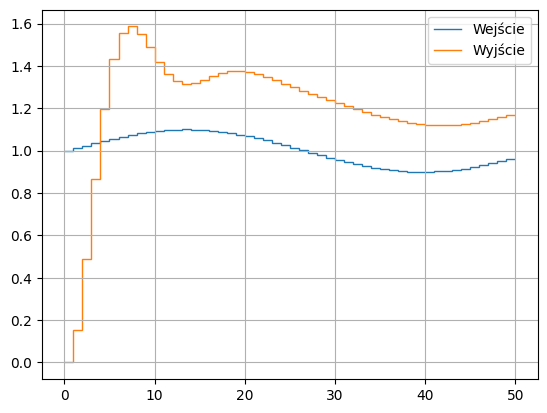

In [5]:
plt.stairs(u.squeeze(), torch.arange(51), baseline=None)
plt.stairs(y.squeeze(), torch.arange(51), baseline=None)
plt.legend(['Wejście', 'Wyjście'])
plt.grid()
plt.show()

In [6]:
u = torch.ones((1, 50), dtype=torch.float64)
y = discrete_system.signal_response(u)

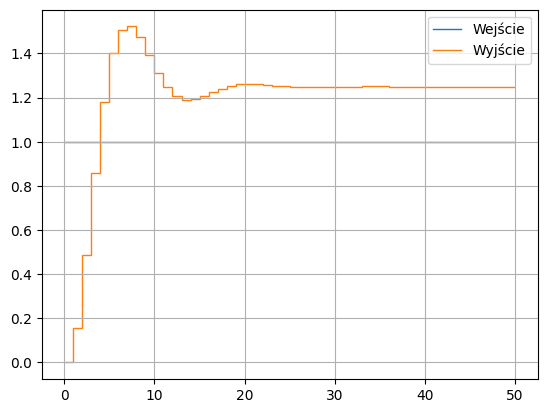

In [7]:
plt.stairs(u.squeeze(), torch.arange(51), baseline=None)
plt.stairs(y.squeeze(), torch.arange(51), baseline=None)
plt.legend(['Wejście', 'Wyjście'])
plt.grid()
plt.show()

In [8]:
y = discrete_system.step_response(len=50)

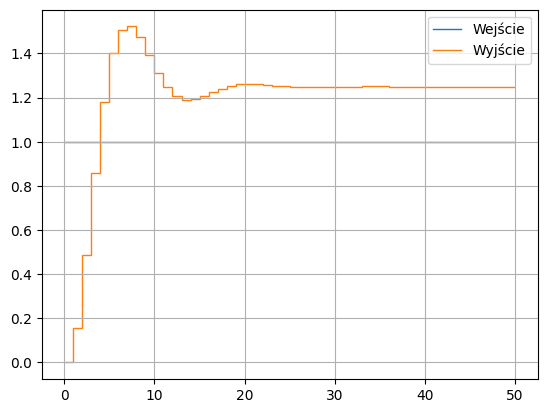

In [9]:
plt.stairs(u.squeeze(), torch.arange(51), baseline=None)
plt.stairs(y.squeeze(), torch.arange(51), baseline=None)
plt.legend(['Wejście', 'Wyjście'])
plt.grid()
plt.show()

### Feedback system

In [10]:
regulator = akson.DiscretePIDRegulator(2.1, 0.16, 0.012, T)

In [11]:
feedback_system = akson.DiscreteFeedbackSystem(regulator, discrete_system)

In [12]:
y = []
for _ in range(100):
    y.append(feedback_system.step(1).item())

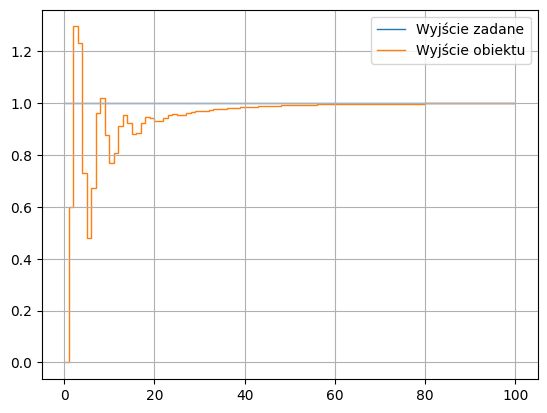

In [13]:
plt.stairs(torch.ones((100,)), torch.arange(101), baseline=None)
plt.stairs(y, torch.arange(101), baseline=None)
plt.legend(['Wyjście zadane', 'Wyjście obiektu'])
plt.grid()
plt.show()

In [14]:
continous_feedback_system = akson.ContinousFeedbackSystem(regulator, continous_system, T)

In [15]:
t = []
y = []
for i in range(100):
    ct, cy = continous_feedback_system.step(torch.tensor(1), step_size=torch.tensor(0.001))
    cy = cy.squeeze()
    if i > 0:
        ct = ct[1:]+t[-1][-1]
        cy = cy[1:]
    t.append(ct)
    y.append(cy)
t = torch.cat(t, dim=0)
y = torch.cat(y, dim=0)
print(t.shape, y.shape)

torch.Size([1501]) torch.Size([1501])


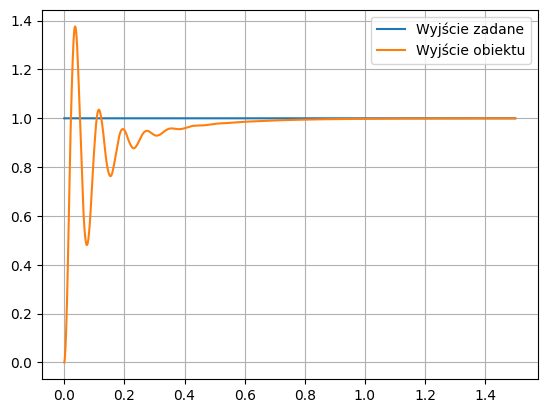

In [16]:
plt.plot(t, torch.ones_like(t))
plt.plot(t, y)
plt.legend(['Wyjście zadane', 'Wyjście obiektu'])
plt.grid()
plt.show()